In [1]:
import os #To explore different folders.
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread #openCV alosn can be used but we shall imread to read the images
from skimage.transform import resize #To resize the images for better model buidling

In [2]:
# I am trying to install the scikit and get access to its libraries

#!pip install scikit-image

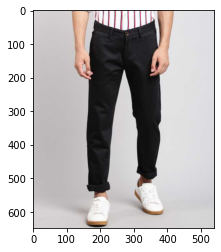

In [3]:
target = []
images = []
flat_data = []

datadir = '/Users/oliverla412/Desktop/Place_project/Image_Classification_Project/Images' #path of the scraped images folder from the colab. (The scraped pictures were uploaded to colab, from there the data was pulled.)
categories = ['jeans', 'sarees', 'trousers']

for i in categories:
    class_num = categories.index(i) #It will label encode the categories of image folders
    path = os.path.join(datadir,i) #path to use all the images
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        plt.imshow(img_array) #The sample image
        break

### The Data is being flattened.

In [4]:
for i in categories:
    class_num = categories.index(i) #It will label encode the categories of image folders
    path = os.path.join(datadir,i) #path to use all the images
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img)) #every image will be read.

        img_resized = resize(img_array, (150, 150, 3)) #Each image will be resized to common size (It normalizes to 0 and 1)
    
        flat_data.append(img_resized.flatten()) #Images will be flattened for image classification post convolution
    
        images.append(img_resized)
        target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


In [5]:
flat_data[0] #pixel points of 1st image

array([0.93333333, 0.93333333, 0.93333333, ..., 0.89411765, 0.89803818,
       0.87843551])

In [6]:
target[0]

0

In [7]:
target[:40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
len(target)

2920

In [9]:
#Let's see the unique return of images count of each category.
#0, 1 and 2 are jeans, sarees and trousers

np.unique(target,return_counts = True)

(array([0, 1, 2]), array([ 920, 1000, 1000]))

<BarContainer object of 3 artists>

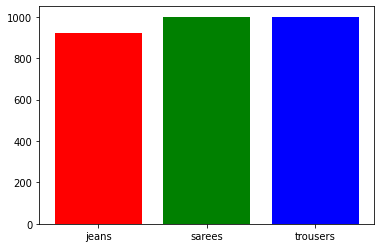

In [10]:
category, count = np.unique(target,return_counts = True)

plt.bar(categories, count,color=['red','green','blue'])

### Clearly, the plot shows the images distribution from each category.

## Model Building

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size = 0.25, random_state = 99)

### SVC MODEL

#### The hyperparameters which can be tuned in order to get the best possible score are being used below.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = [
              {'C':[1,10,100,1000], 'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.01,0.001] ,'kernel':['rbf']} #Kernel with an appropriate C value will be taken by the model to give the best score
]

svc = svm.SVC(probability = True) #This will show the other probabilty along with the main one as well.
clf = GridSearchCV(svc, param_grid) #param_grid will let the default values 
clf.fit(x_train, y_train)